# 중간평가 예상문제 

In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 
tnp.experimental_enable_numpy_behavior()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

## `1`. 경사하강법과 tf.GradientTape()의 사용방법 (30점)

`(1)` 아래는 $X_i \overset{iid}{\sim} N(3,2^2)$ 를 생성하는 코드이다. (10점)

In [3]:
tf.random.set_seed(43052)
x= tnp.random.randn(10000)*2+3
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([ 4.12539849,  5.46696729,  5.27243374, ...,  2.89712332,
        5.01072291, -1.13050477])>

함수 $L(\mu,\sigma)$을 최대화하는 $(\mu,\sigma)$를 `tf.GradientTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\mu$의 초기값은 2로 $\sigma$의 초기값은 3으로 설정할 것) 

$$L(\mu,\sigma)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

**hint**: $L(\mu,\sigma)$를 최대화하는 $(\mu,\sigma)$는 $\log L(\mu,\sigma)$를 역시 최대화한다는 사실을 이용할 것. 

**hint:** $\mu$의 참값은 3, $\sigma$의 참값은 2이다. (따라서 $\mu$와 $\sigma$는 각각 3과 2근처로 추정되어야 한다.) 

In [4]:
tnp.mean(x), tnp.sqrt(tnp.var(x)*(9999/10000)) # MLE of mu and sigma

(<tf.Tensor: shape=(), dtype=float64, numpy=3.0164017983287295>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.9869589700290096>)

In [5]:
mu = tf.Variable(2.0) 
sigma = tf.Variable(3.0)

In [6]:
import math

In [7]:
alpha = 0.0001
opt = tf.keras.optimizers.SGD(alpha)

In [8]:
for epoc in range(10000):
    with tf.GradientTape() as tape:
        # minimize minus log likelihood function
        minus_logL = -tf.reduce_sum(tnp.log((1/tnp.sqrt(2*math.pi)/sigma)*tnp.exp(-(1/2)*((x-mu)/sigma)**2))) 
    slope0,slope1 = tape.gradient(minus_logL,[mu,sigma])
    opt.apply_gradients([(slope0,mu),(slope1,sigma)])

In [9]:
mu, sigma

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0164015>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9870584>)

`(2)` 

`(3)`

## `2`. 회귀분석의 이론적해와 tf.keras.optimizer 이용방법 (20점)

아래와 같은 선형모형을 고려하자. 

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i.$$

이때 오차항은 정규분포로 가정한다. 즉 $\epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$라고 가정한다. 

관측데이터가 아래와 같을때 아래의 물음에 답하라. 

`hint1` alpha=0.0015로 설정할 것

`hint2` epoc은 10000번정도 반복실행하며 적당한 횟수를 찾을 것

`hint3` (1)의 최적값에 반드시 정확히 수렴시킬 필요는 없음 (너무 많은 에폭이 소모됨)

`hint4` 초기값으로 [5,10] 정도 이용할 것

In [10]:
x= tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y= tnp.array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 , 
              63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])
# X= tnp.array([[1.0, 20.1], [1.0, 22.2], [1.0, 22.7], [1.0, 23.3], [1.0, 24.4],
#               [1.0, 25.1], [1.0, 26.2], [1.0, 27.3], [1.0, 28.4], [1.0, 30.4]])

`(1)` MSE loss를 최소화 하는 $\beta_0,\beta_1$의 해석해를 구하라. 

In [11]:
X = tf.stack([tf.ones(10,dtype='float64'),x],axis=1)
y = y.reshape(10,1)
y.shape,X.shape

(TensorShape([10, 1]), TensorShape([10, 2]))

In [12]:
tf.linalg.inv(X.T@X)@X.T@y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.94457323],
       [2.21570461]])>

`(2)` 경사하강법과 MSE loss의 도함수를 이용하여 $\beta_0,\beta_1$을 추정하라. 

**주의** tf.GradientTape()를 이용하지 말고 MSE loss의 해석적 도함수를 사용할 것.

In [31]:
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
alpha=0.0001

In [32]:
for epoc in range(1000):
    slope = -2*X.T@(y-X@beta_hat)
    beta_hat.assign_sub(alpha*slope)

In [33]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89177719],
       [2.21778641]])>

`(3)` `tf.keras.optimizers`의 `apply_gradients()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [34]:
N = 10
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
alpha=0.0001
opt = tf.keras.optimizers.SGD(alpha)

In [35]:
for epoc in range(1000):
    with tf.GradientTape(persistent=True) as tape: 
        tape.watch(beta_hat)
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])

In [36]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89044651],
       [2.21783888]])>

`(4)` `tf.keras.optimizers`의 `minimize()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [37]:
N = 10
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat) / N 
alpha=0.0001 
opt = tf.keras.optimizers.SGD(alpha)

In [38]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [39]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89044651],
       [2.21783888]])>

## `3`. keras를 이용한 풀이 (30점)

`(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i, \quad i=0,1,\dots, 999$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

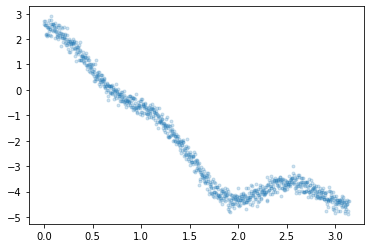

In [40]:
np.random.seed(43052)
t= np.array(range(1000))* np.pi/1000
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.2)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다) 

In [41]:
y = tnp.array(y.reshape(1000,1))
X = tf.stack([tf.ones(1000,dtype='float64'),tnp.array(np.cos(t)),tnp.array(np.cos(2*t)),tnp.array(np.cos(3*t)),
              tnp.array(np.cos(4*t)),tnp.array(np.cos(5*t))],axis=1)
y.shape, X.shape

(TensorShape([1000, 1]), TensorShape([1000, 6]))

In [42]:
tf.random.set_seed(55364) 
## 1단계
net1 = tf.keras.Sequential() 
## 2단계
net1.add(tf.keras.layers.Dense(100,activation='relu')) 
net1.add(tf.keras.layers.Dense(1))
## 3단계 
net1.compile(optimizer=tf.optimizers.SGD(0.01),loss='mse')
## 4단계 
net1.fit(X,y,epochs=1000,verbose=0,batch_size=1000)

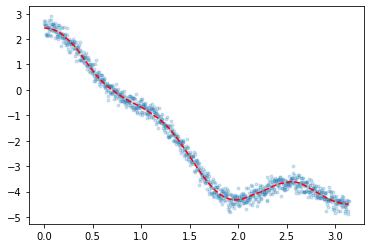

In [43]:
plt.plot(t,y,'.',alpha=0.2)
plt.plot(t,net1(X),'--r')

In [44]:
N = 1000
beta_hat = tf.Variable(tnp.array([0.0,4.0,2.0,1.0,1.0,0.0]).reshape(6,1))
alpha=0.01
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])

In [45]:
beta_hat

<tf.Variable 'Variable:0' shape=(6, 1) dtype=float64, numpy=
array([[-2.01226553e+00],
       [ 3.00103784e+00],
       [ 1.00674977e+00],
       [ 1.88070818e-03],
       [-3.84802712e-03],
       [ 4.97089344e-01]])>

`(2)` 아래와 같은 모형을 고려하자. 

$$y_i \sim Ber(\pi_i), ~ \text{where} ~ \pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$$


위의 모형에서 관측한 데이터는 아래와 같다. 

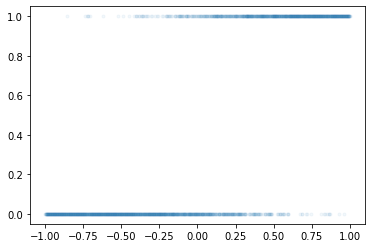

In [47]:
tf.random.set_seed(43052)
x = tnp.linspace(-1,1,2000) 
y = tf.constant(np.random.binomial(1, tf.nn.sigmoid(-1+5*x)),dtype=tf.float64) 
plt.plot(x,y,'.',alpha=0.05)

tf.keras를 이용하여 $w_0,w_1$을 추정하라. (참고: $w_0, w_1$에 대한 참값은 -1과 5이다.) 

In [48]:
N = 2000
x = x.reshape(2000,1)
y = y.reshape(2000,1)
y.shape, x.shape

(TensorShape([2000, 1]), TensorShape([2000, 1]))

In [49]:
tf.random.set_seed(55364)
net2 = tf.keras.Sequential() 
net2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
bceloss_fn = lambda y,yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat))
net2.compile(loss=bceloss_fn, optimizer=tf.keras.optimizers.SGD(0.1))
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

In [50]:
net2.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.093329]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.66782784], dtype=float32)>]

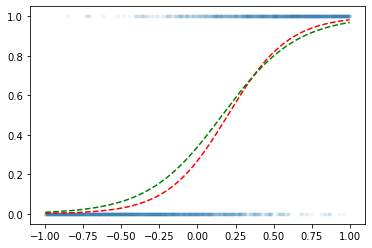

In [52]:
v = tf.nn.sigmoid(-1+5*x)
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net2(x),'--g')

## `4`. Piecewise-linear regression (15점) 

## `5`. 다음을 잘 읽고 참과 거짓을 판단하라. (5점)

`(1)` 적절한 학습률이 선택된다면, 경사하강법은 손실함수가 convex일때 언제 전역최소해를 찾을 수 있다. -> TRUE

`(2)`

`(3)`

`(4)`

`(5)`

### some notes 

`-` 용어를 모르겠는 분은 질문하시기 바랍니다. 

`-` 풀다가 에러나는 코드 질문하면 에러 수정해드립니다. 